# DATASET
The dataset, obtained from Kaggle, comprises mobile phone sales data encompassing various brands and hardware specifications. 
The primary aim of this project is to establish a connection between these features and the corresponding price range. 
Rather than predicting the precise price, the objective is to categorize phones into four distinct price ranges:
There are 4 classes in the price range, namely, 0(low cost), 1(medium cost), 2(high cost)and 3(very high cost). 
DATASET : https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

# PROBLEM STATEMENT
The goal of this project is to develop a machine learning model that predicts the price range of a mobile phone based on its features.

# Import necessary libraries


In [36]:
#Import data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('C:\\Users\\JEBINA P\\Downloads\\train.csv')

In [5]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
df.shape

(2000, 21)

In [8]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [11]:
df.duplicated().sum()

0

# ANALYSIS
The dataset consists of 2000 rows and 21 columns
There are no missing values in the dataset
No Duplicates
Numerical Columns

# Data Vizualization

<Axes: >

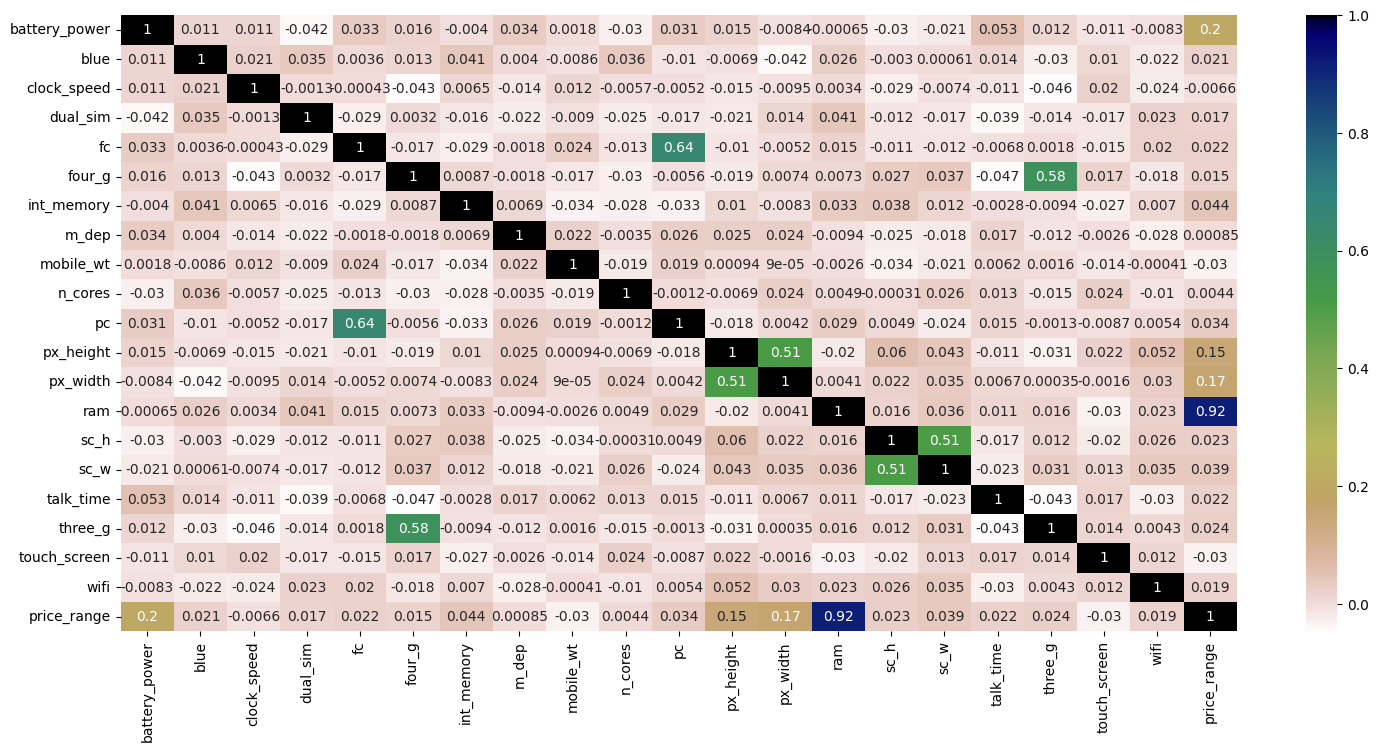

In [12]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(), annot=True, cmap='gist_earth_r')

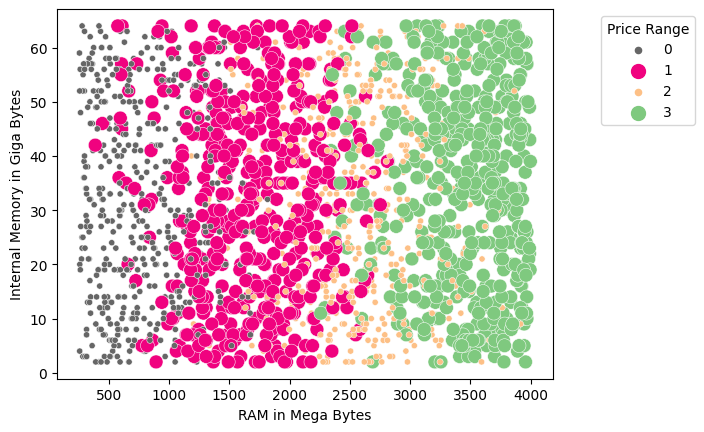

In [15]:
# Create the scatter plot using the data parameter
plot = sns.scatterplot(data=df, x='ram', y='int_memory', size='price_range',
                       hue='price_range', sizes=[20, 100], palette='Accent_r')

# Move the legend
sns.move_legend(plot, 'upper right', bbox_to_anchor=(1.3, 1), title='Price Range')

# Label the axes
plt.xlabel('RAM in Mega Bytes')
plt.ylabel('Internal Memory in Giga Bytes')

# Show the plot
plt.show()


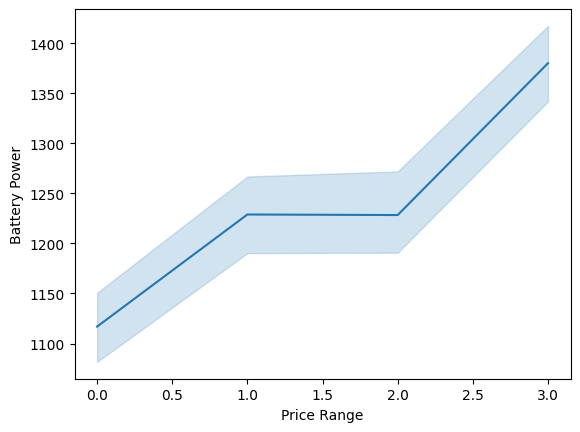

In [18]:
# Create a line plot
sns.lineplot(x=df['price_range'], y=df['battery_power'])

# Label the axes
plt.xlabel('Price Range')
plt.ylabel('Battery Power')

# Show the plot
plt.show()


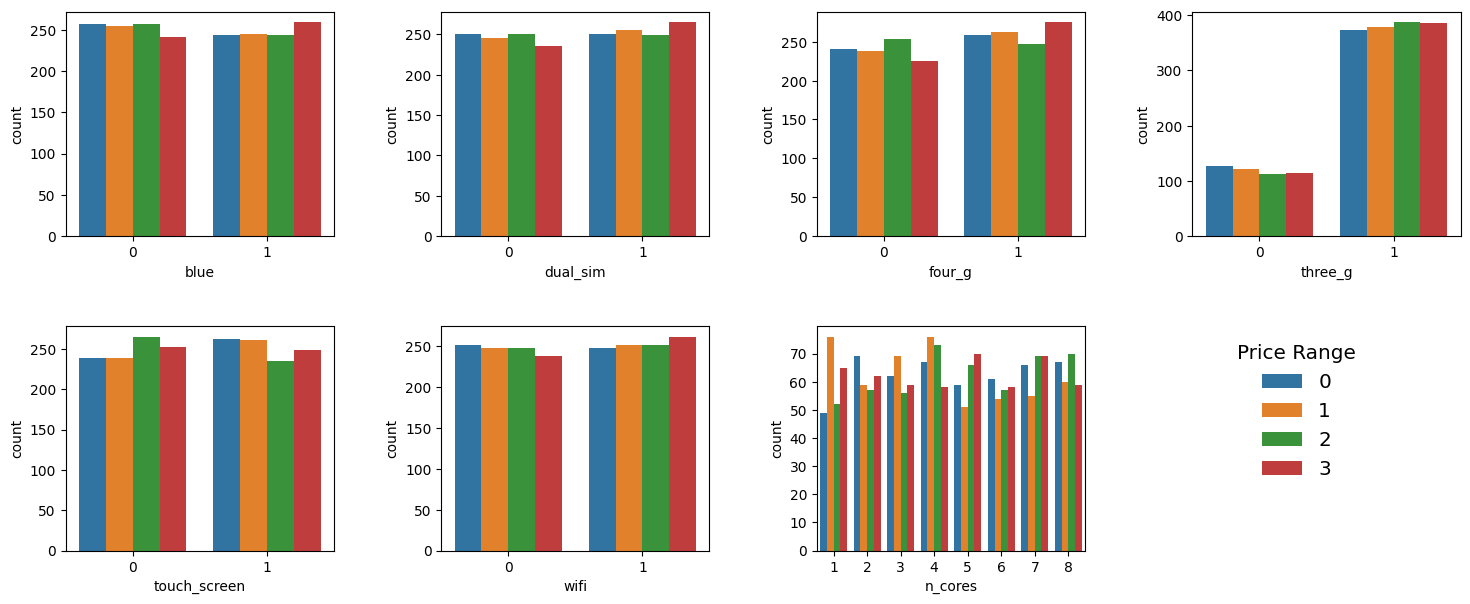

In [19]:
col = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'n_cores']

# Create a figure with a 2x4 grid of subplots
plt.figure(figsize=(18, 7))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Common labels for all subplots
plt.xlabel('Feature')
plt.ylabel('Count')

for i in range(7):
    plt.subplot(2, 4, i + 1)
    sns.countplot(data=df, x=col[i], hue=df["price_range"])
    
    # Remove the legend frame for all subplots
    plt.legend([], [], frameon=False)
    
    if i == 6:
        # Add a custom legend for the last subplot
        plt.legend(title='Price Range', bbox_to_anchor=(1.5, 1), frameon=False, title_fontsize='x-large', fontsize='x-large')

plt.show()


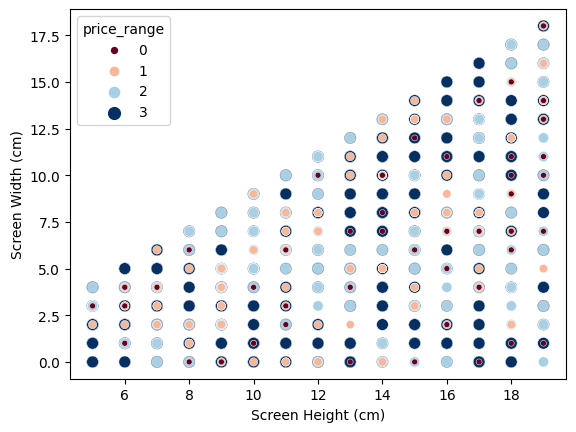

In [20]:
# Create a scatter plot
sns.scatterplot(data=df, x='sc_h', y='sc_w', hue='price_range', size='price_range', palette='RdBu')

# Label the axes
plt.xlabel('Screen Height (cm)')
plt.ylabel('Screen Width (cm)')

# Show the plot
plt.show()


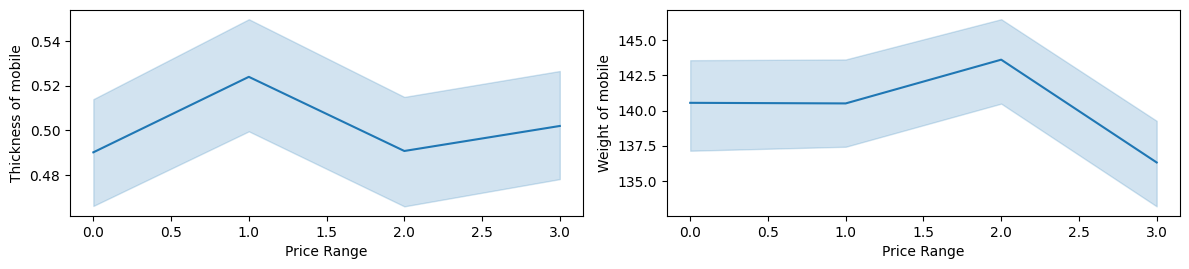

In [21]:
# Create a figure with a 2x2 grid of subplots
plt.figure(figsize=(12, 5))

# First subplot
plt.subplot(2, 2, 1)
sns.lineplot(data=df, x='price_range', y='m_dep')
plt.xlabel('Price Range')
plt.ylabel('Thickness of mobile')

# Second subplot
plt.subplot(2, 2, 2)
sns.lineplot(data=df, x='price_range', y='mobile_wt')
plt.xlabel('Price Range')
plt.ylabel('Weight of mobile')

# Show the plots
plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()


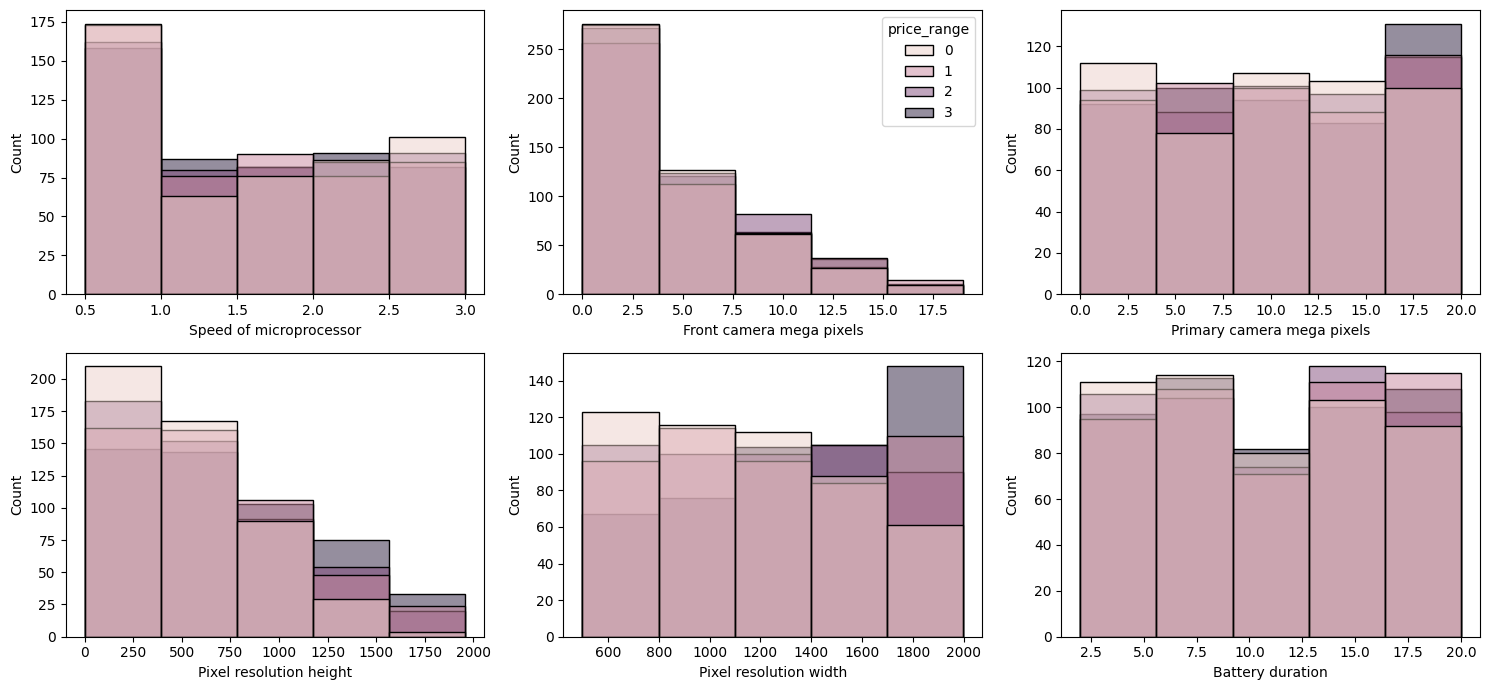

In [22]:
col_list = ['clock_speed', 'fc', 'pc', 'px_height', 'px_width', 'talk_time']
labels = ['Speed of microprocessor', 'Front camera mega pixels', 'Primary camera mega pixels', 
          'Pixel resolution height', 'Pixel resolution width', 'Battery duration']

plt.figure(figsize=(15, 7))

for i in range(6):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=df, x=col_list[i], hue='price_range', bins=5)
    
    if i != 1:
        # Remove the legend frame for all subplots except the second one
        plt.legend([], [], frameon=False)
    
    plt.xlabel(labels[i])

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()


# Model Building: Support Vector Machine (SVM) 

In [27]:
# Assuming you have a DataFrame named df
x = df.drop("price_range", axis=1)
y = df["price_range"]

In [28]:
# Splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

In [29]:
# Feature scaling
ss = StandardScaler()
x_train = pd.DataFrame(ss.fit_transform(x_train))
x_test = pd.DataFrame(ss.transform(x_test))

In [30]:
# Initializing the SVM model
svm_model = SVC(kernel='linear', random_state=42)  # You can choose different kernels (e.g., 'linear', 'rbf', 'poly', etc.)

In [31]:
# Fitting the training data
svm_model.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [32]:
# Prediction
ypredtest_svm = svm_model.predict(x_test)

In [33]:
# Evaluation using sklearn metrics

print("Accuracy of the SVM model is {}%.".format(round(accuracy_score(y_test, ypredtest_svm) * 100, 2)))
print('--------------------------------------------------------------')
print('Confusion matrix: \n', confusion_matrix(y_test, ypredtest_svm))
print('--------------------------------------------------------------')
print('Classification report: \n', classification_report(y_test, ypredtest_svm))

Accuracy of the SVM model is 96.29%.
--------------------------------------------------------------
Confusion matrix: 
 [[168   9   0   0]
 [  2 166   3   0]
 [  0   5 163   6]
 [  0   0   1 177]]
--------------------------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       177
           1       0.92      0.97      0.95       171
           2       0.98      0.94      0.96       174
           3       0.97      0.99      0.98       178

    accuracy                           0.96       700
   macro avg       0.96      0.96      0.96       700
weighted avg       0.96      0.96      0.96       700



# The SVM has 96% Accuracy